In [8]:
import os
import sqlite3
import ujson

# connect with db

In [12]:

SQLITE_DB_PATH = os.getenv("SQLITE_DB_PATH", f"{os.path.expanduser('~')}/.watchtower/watchtower.db")

# connect with db
conn = sqlite3.connect(SQLITE_DB_PATH)

# fetch all literature records as objects
cursor = conn.cursor()
cursor.execute("SELECT * FROM literatures")
literature_records = cursor.fetchall()
headers = [description[0] for description in cursor.description]
records = [dict(zip(headers, record)) for record in literature_records]
for record in records:
    record["content"] = ujson.loads(record["content"])
# close connection
conn.close()



In [35]:
from collections import defaultdict
citation_dict = defaultdict(list)
for record in records:
    # record["content"] = ujson.loads(record["content"])
    # print(f"title:{record['title']}")
    # print(record["content"].keys())
    record_content= record["content"]
    citation_dict[record_content['bibliography']["title"]] = []
    for key, citation in record_content["citations"].items():
        # print(citation["title"])
        citation_dict[citation["title"]].append(record["title"])
print(len(citation_dict))

# sort citation_dict by citation count
citation_dict = dict(sorted(citation_dict.items(), key=lambda x: len(x[1]), reverse=True))

for key, value in citation_dict.items():
    if len(value)<3:
        break
    print(f"{key} : {len(value)}")
    



697
A neural probabilistic language model : 8
A unified architecture for natural language processing: Deep neural networks with multitask learning : 4
A scalable hierarchical distributed language model : 4
Continuous space language models : 4
Long short-term memory : 4
Hierarchical probabilistic neural network language model : 3
Recurrent neural network based language model : 3
Strategies for Training Large Scale Neural Network Language Models : 3
Statistical Language Models based on Neural Networks : 3
Distributed representations of words and phrases and their compositionality : 3


A neural probabilistic language model=>A Unified Architecture for Natural Language Processing: Deep Neural Networks with Multitask Learning
A neural probabilistic language model=>Word representations: A simple and general method for semi-supervised learning
A neural probabilistic language model=>Word representations: A simple and general method for semi-supervised learning
A neural probabilistic language model=>Efficient Estimation of Word Representations in Vector Space
A neural probabilistic language model=>Distributed Representations of Words and Phrases and their Compositionality
A neural probabilistic language model=>Linguistic Regularities in Continuous Space Word Representations
A neural probabilistic language model=>Learning Phrase Representations using RNN Encoder-Decoder for Statistical Machine Translation
A neural probabilistic language model=>Sequence to Sequence Learning with Neural Networks
A unified architecture for natural language processing: Deep neural networks with 

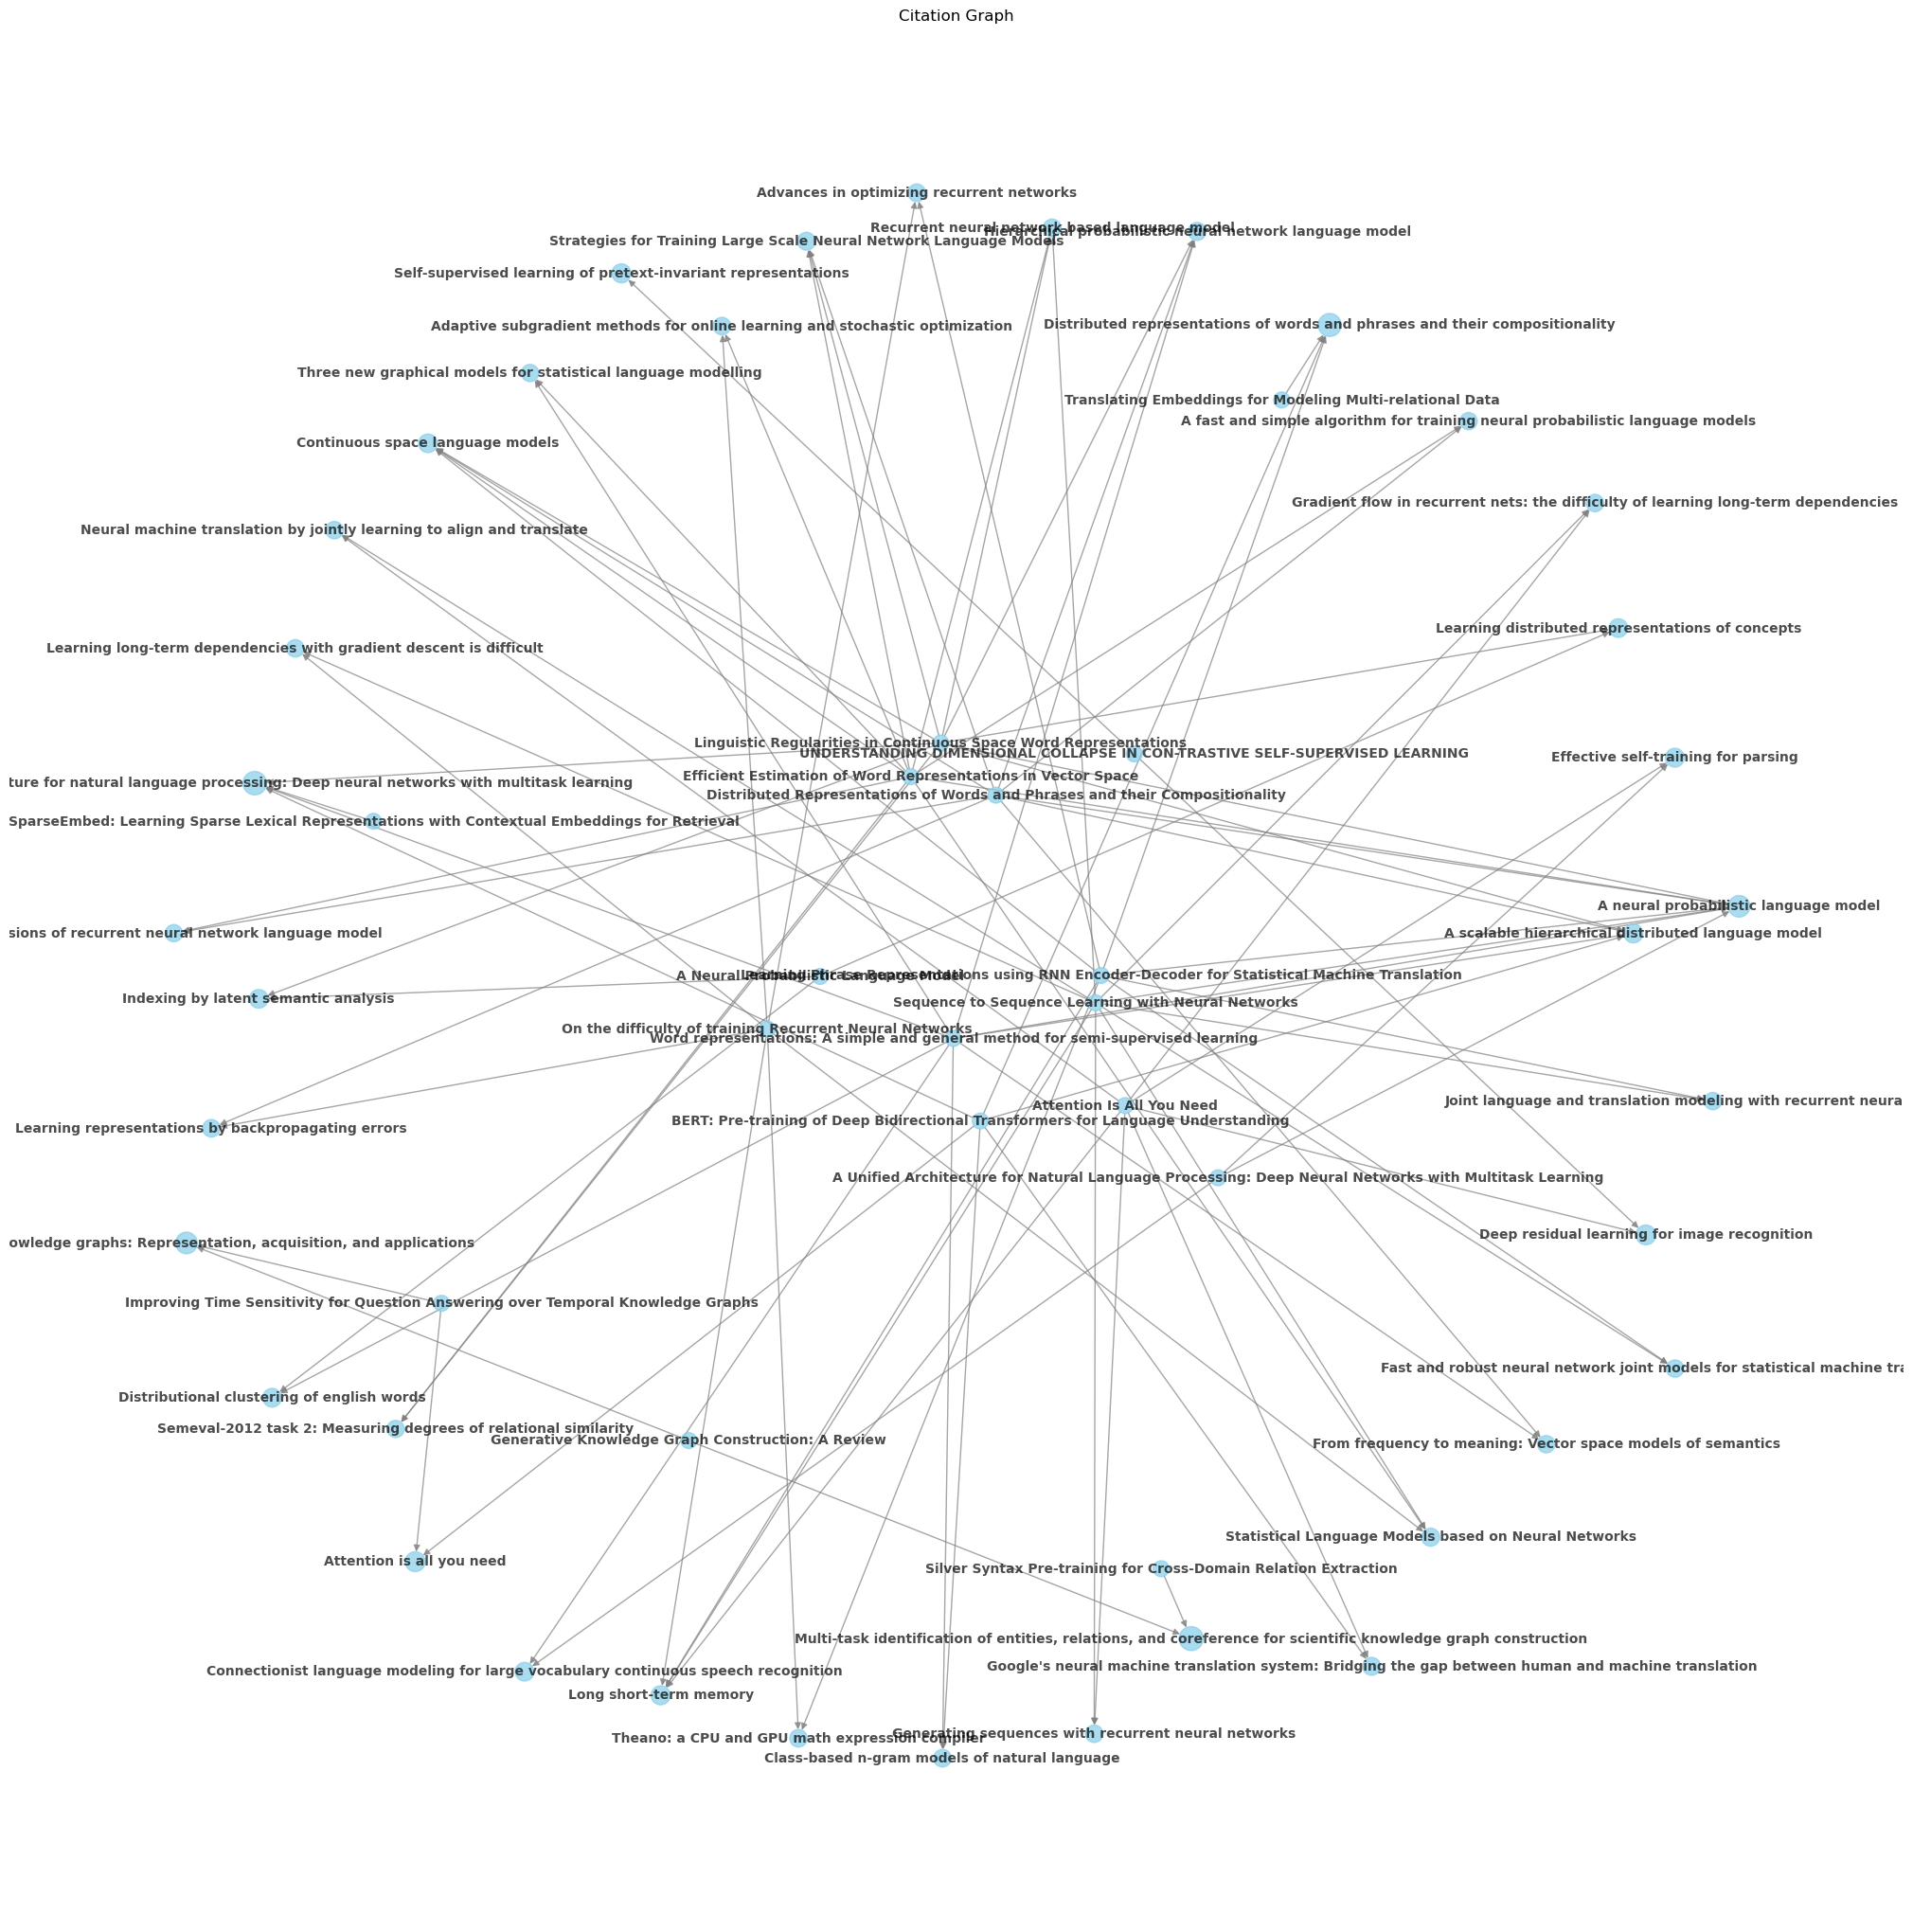

In [42]:
# generate citation graph
import networkx as nx
import matplotlib.pyplot as plt

# draw graph with node size proportional to centrality
def draw_graph(G, pos, node_size, title):
    plt.figure(figsize=(20, 20))
    nx.draw(G, pos, with_labels=True, node_size=node_size, font_size=10, font_color="black", font_weight="bold", node_color="skyblue", edge_color="gray", linewidths=1, width=1, alpha=0.7)
    plt.title(title)
    plt.show()
    

G = nx.DiGraph()
for key, value in citation_dict.items():
    if len(value)<2:
        break
    for v in value:
        print(f"{key}=>{v}")
        G.add_edge(v, key)

# calculate pagerank
pagerank = nx.pagerank(G)
print(pagerank)


# draw graph
pos = nx.spring_layout(G)
node_size = [pagerank[node] * 10000 for node in G]
draw_graph(G, pos, node_size, "Citation Graph")

